In [20]:
import numpy as np
import DeeperDream as dd
import tensorflow as tf
from matplotlib import pyplot as plt
import pickle

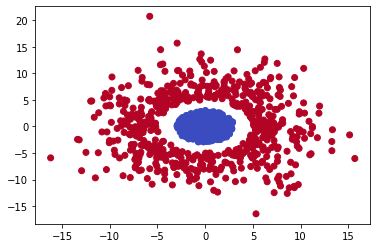

In [2]:
x,y = dd.Toy.Donut(1000, 4, 2)
plt.scatter(x[:,[0]],x[:,[1]],c=y,cmap='coolwarm')

In [3]:
r = np.sqrt(x[:,[0]]**2 + x[:,[1]]**2)
x = np.hstack((x,r))
y = tf.cast(y, tf.float32)
x = tf.cast(x, tf.float32)
x

<tf.Tensor: shape=(1000, 3), dtype=float32, numpy=
array([[-1.9152797 , -0.34380895,  1.9458934 ],
       [-0.49962398,  1.5855904 ,  1.6624444 ],
       [ 2.7923455 , -0.3940292 ,  2.8200095 ],
       ...,
       [ 0.55157477, -5.556727  ,  5.584035  ],
       [ 4.4189076 , -4.3033004 ,  6.1680746 ],
       [-0.49909824, -7.268604  ,  7.285719  ]], dtype=float32)>

In [4]:
a = tf.random.normal((1,1))
b = tf.random.normal((1,1))
c = tf.random.normal((1,1))

In [5]:
with tf.GradientTape() as gt:
    q = a*c
    g = gt.gradient(q, [a,c])
g

[None, None]

In [6]:
a = tf.Variable(a)
b = tf.Variable(b)
c = tf.Variable(c)

In [7]:
with tf.GradientTape() as gt:
    q = a*c
    g = gt.gradient(q, [a,c])
g

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.22656159]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.1328862]], dtype=float32)>]

In [8]:
class Layer(tf.keras.layers.Layer):
    def __init__(self,size_in,size_out,activation_func=tf.sigmoid):
        super().__init__()
        self.w = tf.Variable(tf.random.normal((size_in,size_out)))
        self.b = tf.Variable(tf.random.normal((1,size_out)))
        self.activation_func = activation_func

    def Forward(self,z_in):
        h_out = z_in @ self.w + self.b 
        return self.activation_func(h_out)
    
    def __call__(self, z_in):
        return self.Forward(z_in)

In [9]:
model = Layer(3,1,lambda x: x)

In [10]:
with tf.GradientTape() as gt:
    y_hat = model(x)
    g = gt.gradient(y_hat, model.w)
g

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[  78.11772],
       [ -18.62731],
       [5704.6367 ]], dtype=float32)>

In [11]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(y,y_hat)
loss[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.6797298 ],
       [3.0305233 ],
       [1.2087326 ],
       [0.06474181],
       [0.44187394]], dtype=float32)>

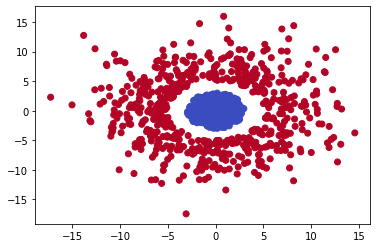

In [12]:
x,y = dd.Toy.Donut(1000, 4, 2)
plt.scatter(x[:,[0]],x[:,[1]],c=y,cmap='coolwarm')

In [13]:
r = np.sqrt(x[:,[0]]**2 + x[:,[1]]**2)
x = np.hstack((x,r))
y = tf.Variable(tf.cast(y, tf.float32))
x = tf.Variable(tf.cast(x, tf.float32))
x

<tf.Variable 'Variable:0' shape=(1000, 3) dtype=float32, numpy=
array([[-0.6186153 , -2.692728  ,  2.7628734 ],
       [-1.5561563 , -0.4857419 ,  1.6302048 ],
       [-2.224293  ,  0.16036947,  2.2300668 ],
       ...,
       [-1.7060541 , -6.2197776 ,  6.449516  ],
       [ 6.9870152 , -0.5134685 ,  7.005857  ],
       [-3.4816635 ,  4.027641  ,  5.323896  ]], dtype=float32)>

In [14]:
model = Layer(3,1,lambda x: x)
iterations = 1000
lr = 1e-4
optim = tf.keras.optimizers.Adam()
for i in range(iterations):
    with tf.GradientTape() as gt:
        y_hat = model(x)
        loss = tf.math.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(y,y_hat))
        grads = gt.gradient(loss, model.variables)
        optim.apply_gradients(zip(grads,model.variables))

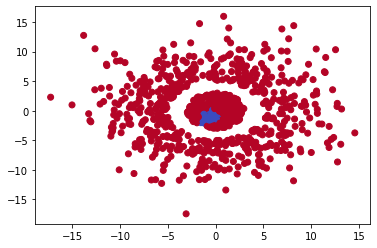

In [15]:
y_hat = tf.reshape(tf.sigmoid(model(x)) > .5, [-1])
plt.scatter(x[:,0],x[:,1],c=y_hat,cmap='coolwarm')

In [16]:
tf.__version__

'2.1.0'

In [26]:
def identity(x):
    return x

class NN(tf.keras.layers.Layer):
    def __init__(self,size_in,size_out):
        super().__init__()
        self.layer_0 = Layer(size_in,8)
        self.layer_1 = Layer(8,8)
        self.layer_2 = Layer(8,size_out, identity)

    def Forward(self,z_in):
        return self.layer_2(self.layer_1(self.layer_0(z_in)))

    def __call__(self, z_in):
        return self.Forward(z_in)

In [27]:
model = NN(3,1)
for i in range(iterations):
    with tf.GradientTape() as gt:
        y_hat = model(x)
        loss = tf.math.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(y,y_hat))
        grads = gt.gradient(loss, model.variables)
        optim.apply_gradients(zip(grads,model.variables))

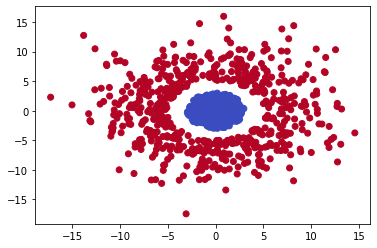

In [28]:
y_hat = tf.reshape(tf.sigmoid(model(x)) > .5, [-1])
plt.scatter(x[:,0],x[:,1],c=y_hat,cmap='coolwarm')

In [29]:
with open('tf_model.pickle', 'wb+') as file:
    pickle.dump(model, file)